IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


## Projet 2021

### Préparation du notebook


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Double-cliquer ici et insérer les noms et prénoms de votre binôme:

    -MISTRY Manishkumar
    -ERGUN Yavuz

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2021</tt> et rajouter à la suite de <tt>projet-2021</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `projet2021-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

## Données

Les données vous sont fournies sur le moodle. 
Ces données sont fournies sur Kaggle, ce sont les données *Google Play Store Apps* accessibles à l'adresse https://www.kaggle.com/lava18/google-play-store-apps.

Il est indispensable de lire en détail la page Kaggle pour comprendre à quoi ces données correspondent.

Le compte-rendu a fournir le jour de la dernière séance de TDTME de votre groupe doit comporter:
- un fichier PDF qui correspond à un poster sur lequel sont expliqués les différents problèmes traités, la façon dont ils ont été traités, et les résultats obtenus.
- un notebook par problème traité, vous pouvez traiter autant de problème que vous le souhaitez. Le problème étudié doit être décrit précisément et vous devez impérativement suivre le format ci-dessous.

Bien entendu, le tout sera mis dans un fichier archive (tar.gz ou zip exclusivement) et déposé sur le site Moodle.


Format à suivre:

## Partie 1 - Description du problème

Les applications de Google Play sont aujourd'hui populaire grace à leur popularité, genre et leure nouvelle mise à jour.


Les notes données permettent de classifier les application. Dans ce notebook, nous avons décider de nous focaliser sur les différentes notes des applications. Dans notre base de données, ces notes sont représenter par la colonne "Rating".

Dans ce projet, nous allons voir en quoi la note (Ratings) peut-elle convaincre l'utilisateur de chosir une applications. On verra sur différent modèle quelle serait la plus adapter.


## Partie 2 - Modèle

Pour y répondre à notre problématique, nous allons se baser sur trois modèles : 

    -Perceptron : est un algortihme d'apprentissage supervisé classification binaire. Il s'agit d'un type de classification linéaire, c'est-à-dire un algortihme de classification qui effectue c'est predictions sur la base d'une d'une fonction prédicteur linéaire combinant un ensemble de poids avec le vecteur caractétistique
    
    -Adaline : est un réseau neuronal simple-couche, avec plusieurs noeuds, chacun acceptant plusieurs entrées et générent une sortie.
    
    -Adaline2: contraire au Perceptron 
 

## Partie 3 - Code

## Importation des librairies

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Chargement des données

Dans notre base de données ont aura des valeurs redondante comme:
    -Nan
    -des valeurs manquantes dans certaine colonne
    -caractères spéciaux
    -valeurs quelconque
Ils seront résolue un par un.

In [2]:
gdata=pd.read_csv('googleplaystore.csv')
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
gdata.shape

(10841, 13)

Il y a 10841 rows et 13 colonne dans le dataset

In [4]:
gdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
gdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


On va utiliser isnull() pour détecter les valeurs manqantes.

In [6]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
gdata.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Il y a des valeurs manquantes dans les attributs comme:
    -Rating
    -Type
    -Content Rating
    -Current Ver
    -Android Ver

# Nettoyage de la Data

In [8]:
gdata=gdata.dropna()

In [9]:
def removing_postfix_and_prefix(column):
    column = column.str.replace('+', '')
    column = column.str.replace(',', '')
    column = column.str.replace('$', '')
    column = column.str.replace("'", '')
    return column

## Nettoyage de Installs

In [10]:
gdata.loc[:,'Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [11]:
gdata['Installs'] = removing_postfix_and_prefix(gdata['Installs'])
gdata.loc[:,'Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [12]:
gdata['Installs'] = pd.to_numeric(gdata['Installs'])
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1023.8+ KB


Notre colonne INSTALL est prête pour analyse

## Nettoyage de Rating

In [14]:
gdata[pd.isnull(gdata['Rating'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
#Les valeurs NaN sont remplacer par la valeur moyenne de l'évaluation
gdata['Rating'].fillna(value=gdata['Rating'].mean(),inplace=True)
gdata['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [16]:
gdata['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Ici on constate que la dernière valeur n'est pas cohérente

In [17]:
gdata['Rating'].replace(19., 4.1, inplace=True)
gdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1023.8+ KB


Notre colonne RATING est prête pour analyse

## Nettoyage de Size

In [18]:
gdata.loc[:,'Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [19]:
trash_data = gdata[gdata['Size'] == "Varies with device"]
gdata.drop(trash_data.index, inplace=True)

In [20]:
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
gdata.shape

(7723, 13)

In [22]:
size_data = gdata['Size'].loc[gdata['Size'].str.contains('k')].index.tolist()
convert_data = pd.DataFrame(gdata.loc[size_data, 'Size'].apply(lambda x : x.strip('k')).astype(float).apply(lambda x : x/1024).apply(lambda x : round(x, 3)).astype(str))
gdata.loc[size_data, 'Size'] = convert_data

gdata['Size'] = gdata['Size'].apply(lambda x:x.strip('M'))
gdata['Size'] = gdata['Size'].astype(float)

In [23]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


Notre colonne Size est prête pour l'analyse

## Nettoyage de Price

In [24]:
gdata.loc[:,'Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [25]:
gdata['Price'] = removing_postfix_and_prefix(gdata['Price'])
gdata.loc[:,'Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [26]:
gdata['Price'] = gdata['Price'].astype(float)
gdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


La colonne Price est prête pour l'analyse

## Nettoyage de Type

In [27]:
gdata.loc[:,'Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [28]:
gdata.loc[:,'Type'] = gdata.loc[:,'Type'].apply(lambda x : 0 if(x == 'Free') else 1)

In [29]:
gdata.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604,1000,0,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600,500,0,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000,5000,0,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600,100,0,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.000,10000000,0,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [30]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   int64  
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


La colonne Type est prête pour analyse

## Nettoyage de Reviews

In [31]:
gdata.loc[:,'Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [32]:
gdata['Reviews'] = gdata['Reviews'].astype(int)

La colonne Review est prête pour l'analyse

## Nettoyage Content Rating

In [33]:
gdata.loc[:,'Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [34]:
gdata = pd.concat([gdata, pd.get_dummies(gdata['Content Rating'], prefix='CR')], axis=1)
gdata.drop(['Content Rating'], axis=1, inplace=True)

In [35]:
gdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,CR_Adults only 18+,CR_Everyone,CR_Everyone 10+,CR_Mature 17+,CR_Teen,CR_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,0,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,0,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,1,0,0,0,0


## Nettoyage de Catégory

In [36]:
gdata.loc[:,'Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [37]:
gdata = pd.concat([gdata, pd.get_dummies(gdata['Category'], prefix='C')], axis=1)
gdata.drop(['Category'], axis=1, inplace=True)

In [38]:
gdata.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0,0.0,Art & Design,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14.0,500000,0,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0,0.0,Art & Design,"August 1, 2018",1.2.4,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0,0.0,Art & Design,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0,0.0,Art & Design;Creativity,"June 20, 2018",1.1,...,0,0,0,0,0,0,0,0,0,0


La colonne Category est prête pour l'analyse

In [39]:
gdata.mean()

Rating                   4.173935e+00
Reviews                  2.948983e+05
Size                     2.297012e+01
Installs                 8.424070e+06
Type                     7.471190e-02
Price                    1.128169e+00
CR_Adults only 18+       2.589667e-04
CR_Everyone              7.983944e-01
CR_Everyone 10+          4.117571e-02
CR_Mature 17+            4.764988e-02
CR_Teen                  1.123916e-01
CR_Unrated               1.294834e-04
C_ART_AND_DESIGN         7.510035e-03
C_AUTO_AND_VEHICLES      8.157452e-03
C_BEAUTY                 4.790884e-03
C_BOOKS_AND_REFERENCE    1.864560e-02
C_BUSINESS               3.185291e-02
C_COMICS                 6.344685e-03
C_COMMUNICATION          2.732099e-02
C_DATING                 2.240062e-02
C_EDUCATION              1.424317e-02
C_ENTERTAINMENT          1.165350e-02
C_EVENTS                 4.920368e-03
C_FAMILY                 2.092451e-01
C_FINANCE                3.444257e-02
C_FOOD_AND_DRINK         1.087660e-02
C_GAME      

## Analyse des données

Ici on analysera chaque donnée traiter après le nettoyage. C'est analyse nous serons utile par rapport aux notes (Ratings) donner par différents domaines et pour prédire une note de l'Application.

Distribution du rating d'une application

/Users/manish/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


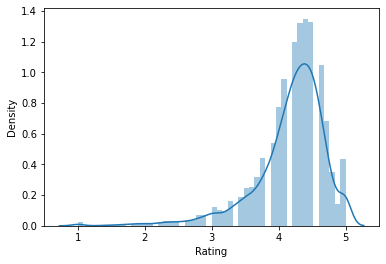

In [40]:
gdata["Rating"]= pd.to_numeric(gdata["Rating"],errors="coerce")
sns.distplot(gdata["Rating"],kde=True);

La distribution est fortement inclinée vers la droite, ce qui implique qu'il y a moins d'applications qui ont un faible classement.
La distribution présente un aplatissement élevé, ce qui indique que beaucoup d'applications ont une note comprise entre 4,1 et 4,5.

Rating par rapport aux Review 

/Users/manish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


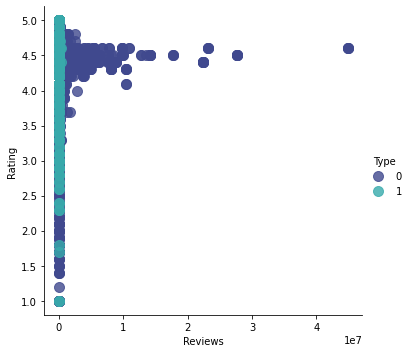

In [41]:
sns.lmplot("Reviews","Rating",data=gdata,hue="Type",fit_reg=False,palette="mako",scatter_kws={"marker":"D","s":100})
plt.show()

Les applications gratuites (0) ont plus de succès que les applications payantes (1).

Rating par rapport à l'installations

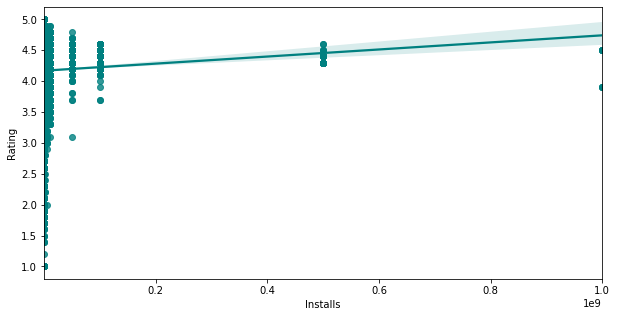

In [42]:
plt.figure(figsize = (10,5))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=gdata);


## Split les donnés

In [43]:
#features = gdata[['Reviews', 'Size', 'Price', 'Installs', 'CR_Adults only 18+','CR_Everyone','CR_Everyone 10+', 'CR_Mature 17+','CR_Teen','CR_Unrated', 'C_PERSONALIZATION','C_PHOTOGRAPHY','C_PRODUCTIVITY','C_SHOPPING','C_SOCIAL','C_SPORTS','C_TOOLS','C_TRAVEL_AND_LOCAL','C_VIDEO_PLAYERS', 'C_WEATHER' ]]

In [44]:
Label = []
gdata['Rating']
#gdata['Rating'] = gdata['Rating'].astype(int)
for i in gdata['Rating']:
    if i < 2.5:
        Label.append(-1)
    else:
        Label.append(1)
#label = []
#gdata['Rating']
#for i in gdata['Rating']:
#    label.append(round(i * 2) / 2)

## creation de la colonne label
gdata['Label'] = Label

In [45]:
# drop des colonnes inutiles 
df = gdata.drop(['App', 'Rating', 'Type', 'Current Ver', 'Android Ver', 'Last Updated','Genres'], axis='columns')

data_desc = df.values
data_label = df['Label'].values

In [46]:
df['Label'].unique()
#np.asarray(df['Rating'])
#Rating_arrat = np.asarray(df['Rating'])
#print(Rating_arrat)
df

,Reviews,Size,Installs,Price,CR_Adults only 18+,CR_Everyone,CR_Everyone 10+,CR_Mature 17+,CR_Teen,CR_Unrated,...,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER,Label
0,159,19.000,10000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,967,14.000,500000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,87510,8.700,5000000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,215644,25.000,50000000,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,967,2.800,100000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44,0.604,1000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10834,7,2.600,500,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10836,38,53.000,5000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10837,4,3.600,100,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
from sklearn import preprocessing
data_desc = preprocessing.StandardScaler().fit(data_desc).transform(data_desc)
print(data_desc)
data_desc.shape

[[-0.15813783 -0.1693128  -0.16776413 ... -0.1234873  -0.08153251
   0.12930323]
 [-0.15770431 -0.38254668 -0.15799426 ... -0.1234873  -0.08153251
   0.12930323]
 [-0.11127099 -0.60857459 -0.06827091 ... -0.1234873  -0.08153251
   0.12930323]
 ...
 [-0.15820275  1.28067758 -0.16786382 ... -0.1234873  -0.08153251
   0.12930323]
 [-0.15822099 -0.82607314 -0.16796152 ... -0.1234873  -0.08153251
   0.12930323]
 [ 0.05548237 -0.1693128   0.03142171 ... -0.1234873  -0.08153251
   0.12930323]]


(7723, 44)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_desc, data_label, test_size=0.2, random_state=42)

In [49]:
print(X_train)

[[-0.15820704 -0.81754379 -0.16794358 ... -0.1234873  -0.08153251
   0.12930323]
 [-0.15323069 -0.38254668 -0.14802499 ... -0.1234873  -0.08153251
   0.12930323]
 [-0.15287121 -0.21195957 -0.14802499 ... -0.1234873  -0.08153251
   0.12930323]
 ...
 [-0.04011845 -0.510487    0.03142171 ... -0.1234873  -0.08153251
   0.12930323]
 [-0.12259348 -0.1693128  -0.14802499 ... -0.1234873  -0.08153251
   0.12930323]
 [-0.15821402 -0.96936631 -0.16794358 ... -0.1234873  -0.08153251
   0.12930323]]


In [50]:
print(y_train)

[1 1 1 ... 1 1 1]


## Partie 4 - Protocole expérimental

# Perceptron

In [51]:
learning_rate = 1e-3
perceptron = cl.ClassifierPerceptron(data_desc[0].size, learning_rate, history = True)
#perceptronMulti = cl.ClassifierMultiOAA(perceptron)

In [52]:
perceptron.train(X_train,y_train)
test = perceptron.accuracy(X_test,y_test)
print("Accuracy sur données de test: ",test)
train = perceptron.accuracy(X_train,y_train)
print("Accuracy sur données d'apprentissage: ",train)

Accuracy sur données de test:  0.8161812297734627
Accuracy sur données d'apprentissage:  0.8570734865652314


In [53]:
for i in range(0, 10):
    print(i+1,": (", y_test[i],") ->",perceptron.predict(X_test[i,:] ))

1 : ( 1 ) -> -1
2 : ( 1 ) -> 1
3 : ( 1 ) -> 1
4 : ( 1 ) -> 1
5 : ( 1 ) -> 1
6 : ( 1 ) -> 1
7 : ( 1 ) -> -1
8 : ( 1 ) -> -1
9 : ( 1 ) -> 1
10 : ( 1 ) -> 1


## Cross Validation Perceptron

In [54]:
import timeit
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3


niter = 10 
perf = []

nb_train=10
tic = timeit.default_timer() # heure de départ
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X_train, y_train, niter, i)
    #c = cl.ClassifierPerceptron(data_desc[0].size,learning_rate)
    c = perceptron
    for j in range(0,nb_train):
        c.train(Xapp, Yapp)
    perf.append(c.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: Perceptron avec nb_train= {nb_train} --> {toc-tic:.5f} secondes')
print(f'Résultat global:moyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9880220135966332
Apprentissage  2 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9998381353188734
Apprentissage  3 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  1.0
Apprentissage  4 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  1.0
Apprentissage  5 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  1.0
Apprentissage  6 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  1.0
Apprentissage  7 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  1.0
Apprentissage  8 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  1.0
Apprentissage  9 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  1.0
Apprentissage  10 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  1.0

Résultat global:	moyenne= 0.999	écart-type= 0.004

Temps mis: Perceptron avec nb_train= 10 --> 3.06216 secondes
Résultat global:moyenne= 0.999	écart-type= 0.004


# Adaline

In [55]:
learning_rate = 1e-3
adaline = cl.ClassifierADALINE(data_desc[0].size,learning_rate, history = True)
#erceptronMultiAda = cl.ClassifierMultiOAA(adaline)

In [56]:
adaline.train(X_train,y_train)
test = adaline.accuracy(X_test,y_test)
print("Accuracy sur données de test: ",test)
train = adaline.accuracy(X_train,y_train)
print("Accuracy sur données d'apprentissage: ",train)

Accuracy sur données de test:  0.6673139158576051
Accuracy sur données d'apprentissage:  0.6620265458077048


## CrossVal Adaline

In [57]:
import timeit
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3


niter = 10 
perf = []

nb_train=10
tic = timeit.default_timer() # heure de départ
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X_train, y_train, niter, i)
    #c = cl.ClassifierPerceptron(data_desc[0].size,learning_rate)
    c = adaline
    for j in range(0,nb_train):
        c.train(Xapp, Yapp)
    perf.append(c.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: Perceptron avec nb_train= {nb_train} --> {toc-tic:.5f} secondes')
print(f'Résultat global:moyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.5734865652314665
Apprentissage  2 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.6267400453221107
Apprentissage  3 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9833279378439624
Apprentissage  4 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.016672062156037552
Apprentissage  5 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.016833926837164132
Apprentissage  6 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.016672062156037552
Apprentissage  7 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9831660731628359
Apprentissage  8 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.016672062156037552
Apprentissage  9 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9831660731628359
Apprentissage  10 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9833279378439624

Résultat global:	moyenne= 0.520	écart-type= 0.434

Temps mis: Perceptron avec nb_train= 10 --> 2.29152 secondes
Résultat global:moyenne= 0.520	écart-type= 0.434


# Adaline 2

In [58]:
adaline2 = cl.ClassifierADALINE2(data_desc[0].size)
#perceptronMultiAda2 = cl.ClassifierMultiOAA(adaline2)

In [59]:
adaline2.train(X_train,y_train)
train = adaline2.accuracy(X_train,y_train)
print("Accuracy sur données d'apprentissage: ",train)
test = adaline2.accuracy(X_test,y_test)
print("Accuracy sur données de test: ",test)

Accuracy sur données d'apprentissage:  0.9393007445775332
Accuracy sur données de test:  0.9048543689320389


In [60]:
for i in range(0,5):
    print(i+1,": ",y_test[i]," --> ",adaline2.predict(X_test[i,:]))

1 :  1  -->  -1
2 :  1  -->  1
3 :  1  -->  1
4 :  1  -->  1
5 :  1  -->  1


## CrossValidation Adaline 2

In [61]:
import timeit
# Changement du learning rate : on le prend très grand !
learning_rate = 1e-3


niter = 10 
perf = []

nb_train=10
tic = timeit.default_timer() # heure de départ
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(X_train, y_train, niter, i)
    #c = cl.ClassifierPerceptron(data_desc[0].size,learning_rate)
    c = adaline2
    for j in range(0,nb_train):
        c.train(Xapp, Yapp)
    perf.append(c.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global:\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

toc = timeit.default_timer() # heure d'arrivée

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: Perceptron avec nb_train= {nb_train} --> {toc-tic:.5f} secondes')
print(f'Résultat global:moyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.8750404661702816
Apprentissage  2 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.8870184525736484
Apprentissage  3 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.8709938491421172
Apprentissage  4 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.889122693428294
Apprentissage  5 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9179346066688249
Apprentissage  6 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9046617028164454
Apprentissage  7 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.8980252508902558
Apprentissage  8 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.9229524117837488
Apprentissage  9 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.8853998057623826
Apprentissage  10 :	  |Yapp|=  5561  |Ytest|=  6178 	perf=  0.8909032049206863

Résultat global:	moyenne= 0.894	écart-type= 0.016

Temps mis: Perceptron avec nb_train= 10 --> 0.54498 secondes
Résultat global:moyenne= 0.894	écart-type= 0.016


## Partie 5 - Résultats

In [62]:
df

,Reviews,Size,Installs,Price,CR_Adults only 18+,CR_Everyone,CR_Everyone 10+,CR_Mature 17+,CR_Teen,CR_Unrated,...,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER,Label
0,159,19.000,10000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,967,14.000,500000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,87510,8.700,5000000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,215644,25.000,50000000,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,967,2.800,100000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44,0.604,1000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10834,7,2.600,500,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10836,38,53.000,5000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10837,4,3.600,100,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Résultat Perceptron

In [66]:
perceptron.w
#adaline2.w

array([ 2.72172325e-03,  4.02263901e-04,  6.94542652e-03,  1.17708472e-02,
        1.98585072e-02, -1.70002490e-03,  2.83052493e-03, -1.53668302e-04,
       -7.81821967e-05,  1.37482368e-02,  9.49030083e-03,  7.35976476e-03,
        4.02658223e-03,  2.21758675e-03,  6.02243367e-04,  1.80491374e-03,
        1.50281867e-03, -7.89127224e-04,  2.87493546e-03, -4.08241343e-05,
        6.38491999e-03, -5.47018254e-03, -2.98737585e-03, -7.37120652e-05,
       -5.67687982e-03, -2.45331071e-03,  5.68371158e-03,  1.67094400e-03,
       -1.06996299e-03, -1.52627273e-03, -2.13954420e-03,  3.46044099e-03,
        4.09745006e-03, -2.87189552e-03,  2.50495779e-03,  1.53518711e-03,
       -7.47000318e-04, -9.88405660e-04, -2.13050472e-03, -3.82891113e-03,
       -2.05541966e-03,  4.83129986e-03,  7.89349345e-03,  7.88519843e+00])

Précédement, nous avons vu que nous obtenons une bonne classification avec le perceptronMulti cela est du à la majorité des applications ayant une très bonne note soit supérieur à 2.5. En affichant les données, nous pouvons le remarquer grace aux catégories Weather (2), Productivity(5). On constate que dans le Content_Ratings, CR_Adult only 18+ a un poid élever de 9.

## Partie 6 - Analyse

## Conclusion

La majoritaire des applications sont gratuite. Ces dernières sont donc les plus vues et meilleures notés. Les applications les mieux notés sont donc ceux qui sont les plus choisi par les gens.

Ainsi, nous pouvons en déduire que les applications avec de meilleurs notes ont un impact fort sur le nombre de son installation.